## Notebook Imports and Packages

In [27]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Example 1 - A simple cost function

### $$f(x) = x^2 + x + 1$$

In [28]:
def f(x):
    return x**2 + x + 1
def df(x):
    return 2*x + 1

In [29]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=100)

## Gradient Descent

In [30]:
new_x = 3
prev_x = 0
gamma = 0.1
precision = 10**-7

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    # Move against the gradient towards the minimum
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - (gamma * gradient)
    
    # Add this x to graph
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    # Stop once we are close enough
    step_size = abs(new_x - prev_x)
    if step_size < precision:
        print("Iterations: ", n)
        break
    
print("Local minimum occurs at: ", new_x)
print("Slope at this point (df(x)): ", df(new_x))
print("Cost at this point (f(x)): ", f(new_x))

Iterations:  71
Local minimum occurs at:  -0.4999996314069791
Slope at this point (df(x)):  7.371860417659803e-07
Cost at this point (f(x)):  0.7500000000001359


<function matplotlib.pyplot.show(close=None, block=None)>

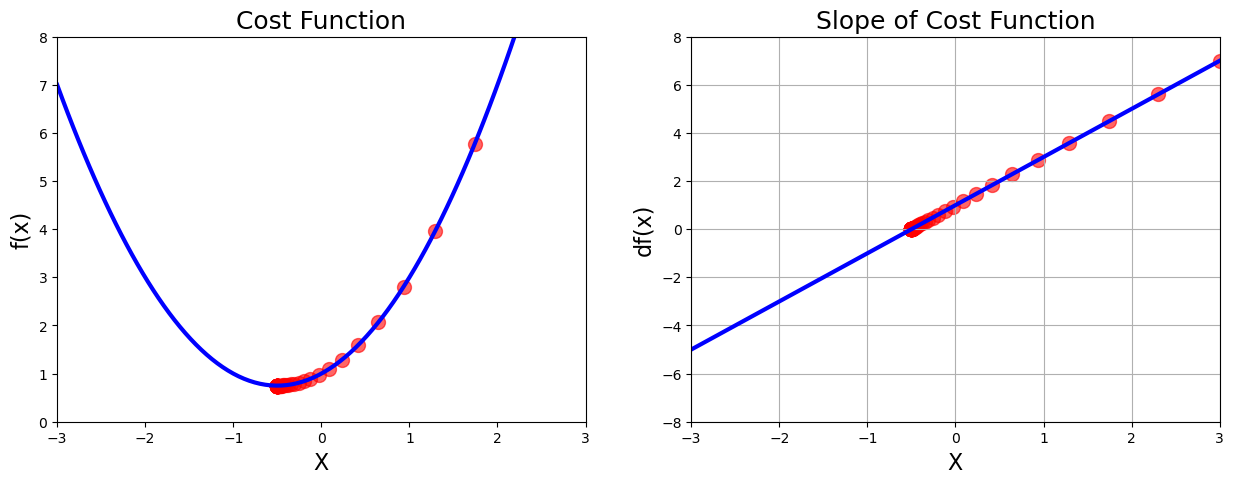

In [31]:
# Superimpose gradient descent calculations on plot of cost function
plt.figure(figsize=[15,5])

# Chart 1: cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('Cost Function', fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

vals = np.array(x_list)
plt.scatter(x_list, f(vals), color='red', s=100, alpha=0.6)

#Chart 2: derivative
plt.subplot(1, 2, 2)
plt.xlim(-3, 3)
plt.ylim(-8, 8)
plt.grid()
plt.title('Slope of Cost Function', fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1), color='blue', linewidth=3)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)


plt.show

## Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

### $$g(x) = x^4 - 4x^2 + 5$$

In [32]:
# Make the data
x_2 = np.linspace(-2, 2, 1000)

# Define functions
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

## Gradient Descent as a Python Function

In [33]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        # Move against the gradient towards the minimum
        prev_x = new_x
        gradient = derivative_func(prev_x)
        new_x = prev_x - (multiplier * gradient)

        # Add this x to graph
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        # Stop once we are close enough
        step_size = abs(new_x - prev_x)
        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [34]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5)
print('Local min occurs at: ', local_min)
print('Iterations: ', len(x_list))

Local min occurs at:  1.4122375085019094
Iterations:  73


<function matplotlib.pyplot.show(close=None, block=None)>

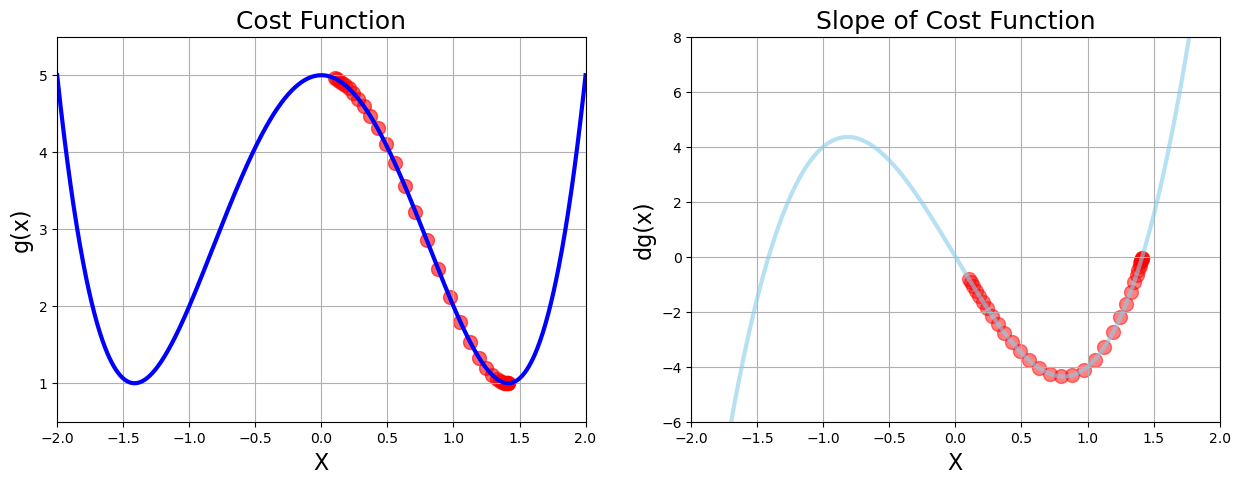

In [35]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1)

# Superimpose gradient descent calculations on plot of cost function
plt.figure(figsize=[15,5])

# Chart 1: cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.grid()

plt.title('Cost Function', fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha = 0.6)

#Chart 2: derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()

plt.title('Slope of Cost Function', fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha = 0.5)

plt.show

## Example 3 - Divergence and Overflow
### $$h(x) = x^5 - 2x^4 + 2$$

In [36]:
# Make the data
x_3 = np.linspace(-2.5, 2.5, 1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

Local min occurs at:  -2071072.4470816324
Cost at this minimum:  -3.810455326061589e+31
Iterations: 71


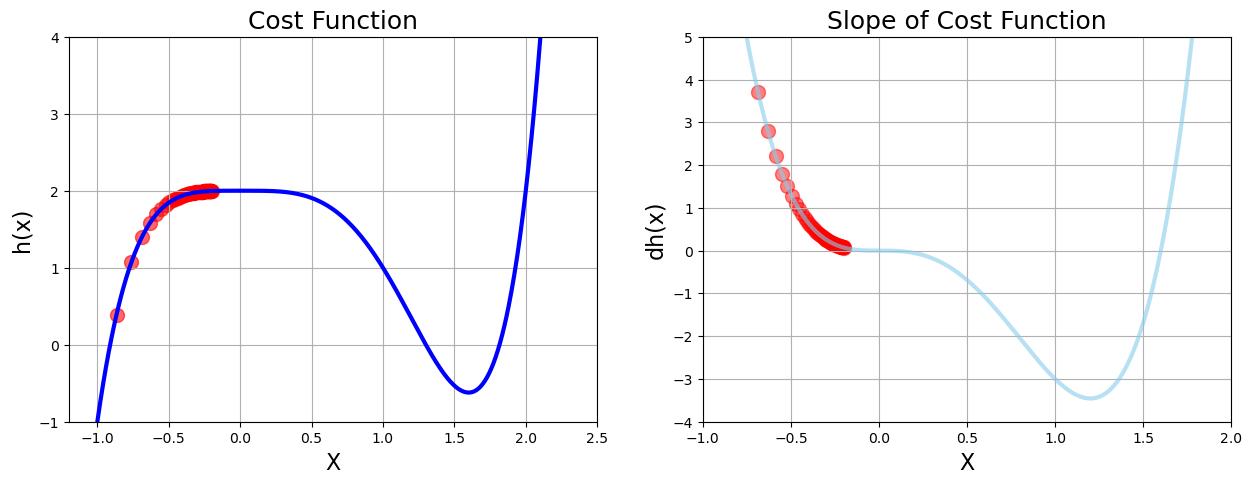

In [37]:
# Calling gradient descent function (OVERFLOWS DUE TO DIVERGENCE, set max_iter to < 70 to avoid)
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=70)

# Superimpose gradient descent calculations on plot of cost function
plt.figure(figsize=[15,5])

# Chart 1: cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.grid()

plt.title('Cost Function', fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha = 0.6)

#Chart 2: derivative
plt.subplot(1, 2, 2)

plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.grid()

plt.title('Slope of Cost Function', fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha = 0.5)

plt.show

print("Local min occurs at: ", local_min)
print("Cost at this minimum: ", h(local_min))
print("Iterations:", len(list_x))

## The Learning Rate
### Example 1: learning rate too large, algorithm doesn't converge

<function matplotlib.pyplot.show(close=None, block=None)>

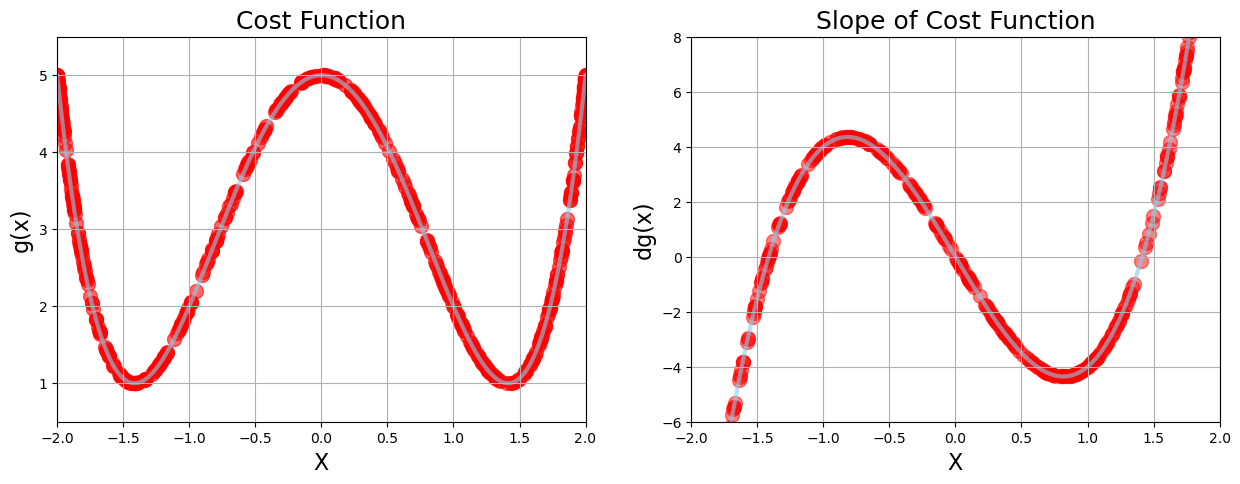

In [38]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1, multiplier=0.25, max_iter=500)

# Superimpose gradient descent calculations on plot of cost function
plt.figure(figsize=[15,5])

# Chart 1: cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.grid()

plt.title('Cost Function', fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha = 0.6)

#Chart 2: derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()

plt.title('Slope of Cost Function', fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha = 0.5)

plt.show

### Example 2: observing differences between learning rates

<function matplotlib.pyplot.show(close=None, block=None)>

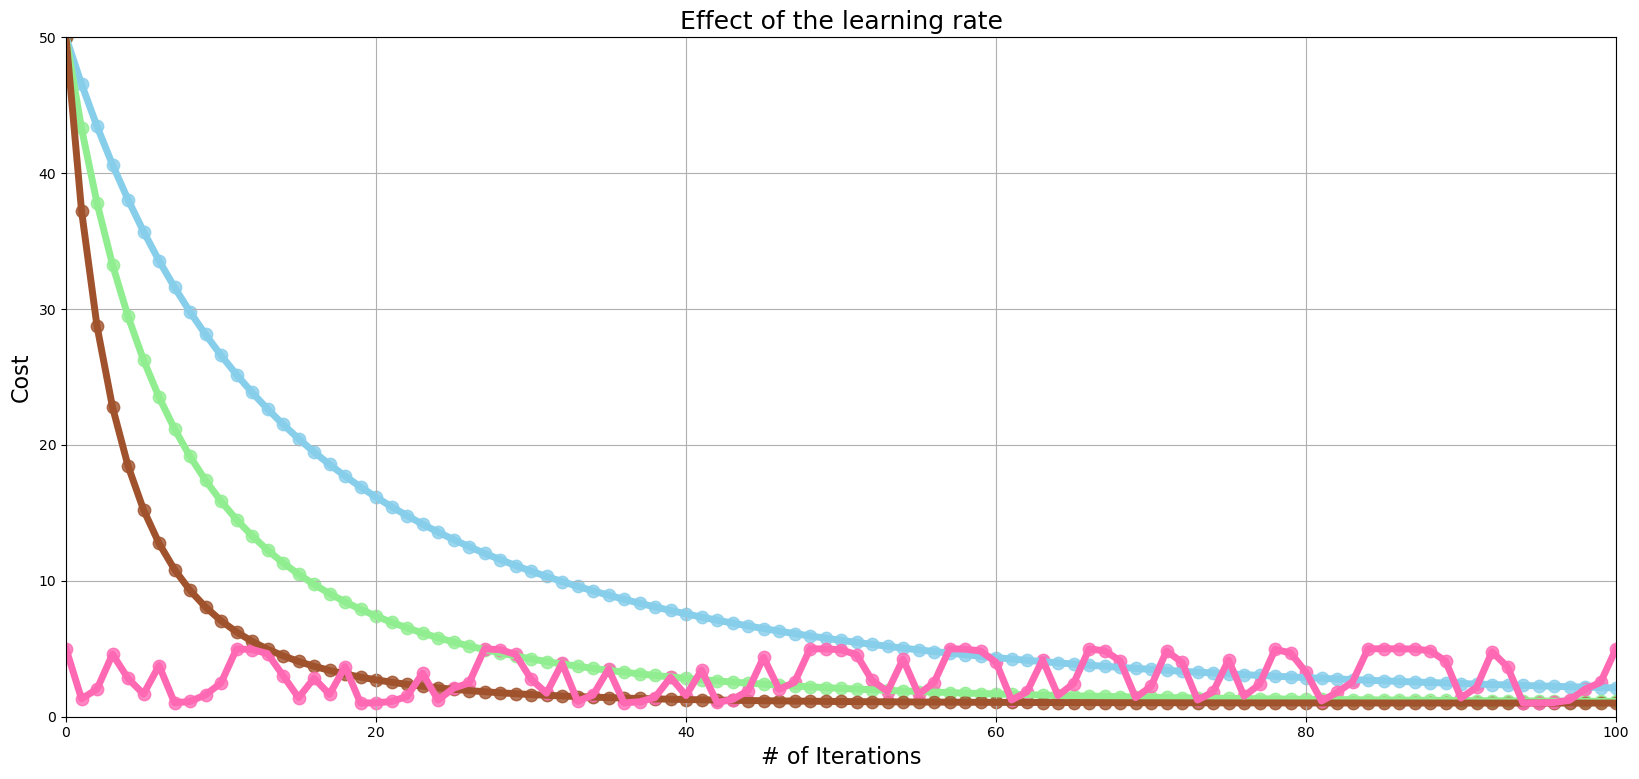

In [39]:
# Running gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.002, precision=0.0001, max_iter=n)
too_high_gamma = gradient_descent(derivative_func=dg, initial_guess=2,
                             multiplier=0.2, precision=0.0001, max_iter=n)



# Plotting reduction in cost for each iteration, comparing learning rates
plt.figure(figsize=[20, 30])


# Plot 1: low learning rate
plt.subplot(3, 1, 1)
plt.xlim(0, n)
plt.ylim(0, 50)
plt.grid()

plt.title('Effect of the learning rate', fontsize=18)
plt.xlabel('# of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
too_high_values = np.array(too_high_gamma[1])
iteration_list = list(range(0, n+1))

plt.plot(iteration_list, g(low_values), color='skyblue', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='skyblue', s=80, alpha=0.8)

plt.plot(iteration_list, g(mid_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='lightgreen', s=80, alpha=0.8)

plt.plot(iteration_list, g(high_values), color='sienna', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='sienna', s=80, alpha=0.8)

plt.plot(iteration_list, g(too_high_values), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(too_high_values), color='hotpink', s=80, alpha=0.8)

plt.show

## Example 4 - Data Visualization with 3D Charts

### Minimize $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

In [40]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [41]:
# Make x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

# Make 2-dimensional
x_4, y_4 = np.meshgrid(x_4, y_4)

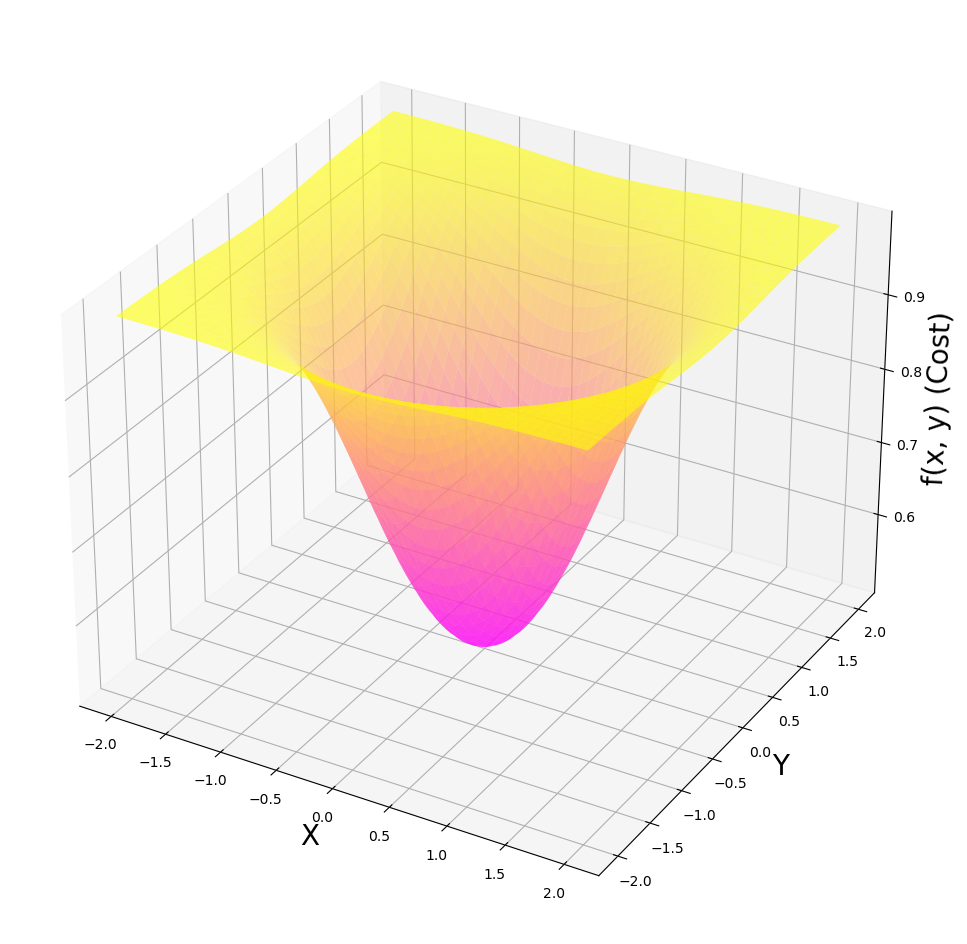

In [42]:
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x, y) (Cost)", fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.spring, alpha=0.6)

plt.show()

### Partial Derivatives, Symbolic Computation, and Batch Gradient Descent with SymPy

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}
                                       {\left(3^{-x^2 - y^2} + 1 \right)^2}$$

In [43]:
# Setup using cost function from above
x, y = symbols("x, y")
print("Cost function: ", f(x, y))
print("Partial derivative w/r/t x: ", diff(f(x, y), x))
print("Partial derivative w/r/t y: ", diff(f(x, y), y))

# Batch Gradient Descent
multiplier = 0.1
max_iter = 400
params = np.array([1.5, 1.5])
x_list = np.array([1.5])
y_list = np.array([1.5])


for n in range(max_iter):
    gradient_x = diff(f(x, y), x).evalf(subs={x:params[0], y:params[1]})
    gradient_y = diff(f(x, y), y).evalf(subs={x:params[0], y:params[1]})
    params[0] = params[0] - (multiplier * gradient_x)
    params[1] = params[1] - (multiplier * gradient_y)
    
    x_list = np.append(x_list, params[0])
    y_list = np.append(y_list, params[1])

print(f"Minimum found at: {params[0]}, {params[1]}")
print("Cost at this point: ", f(x, y).evalf(subs={x:params[0], y:params[1]}))
print("Iterations: ", len(x_list))

Cost function:  1/(3**(-x**2 - y**2) + 1)
Partial derivative w/r/t x:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial derivative w/r/t y:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Minimum found at: 2.0658299970959633e-08, 2.0658299970959633e-08
Cost at this point:  0.500000000000000
Iterations:  401


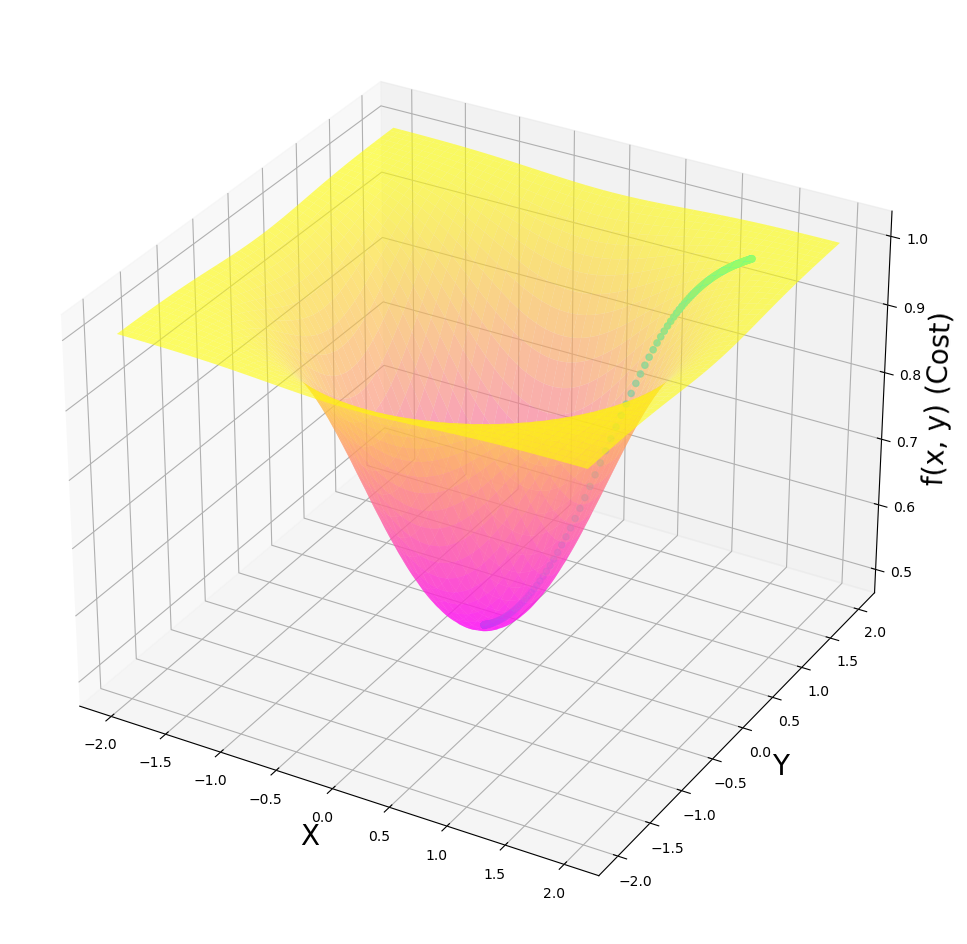

In [44]:
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x, y) (Cost)", fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.spring, alpha=0.6)
ax.scatter(x_list, y_list, f(x_list, y_list), color='cyan')

plt.show()

## Example 5: MSE - A Real Cost Function

### $$RSS = \sum_{i=1}^{n} \big(y - \hat{y}\big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y}\big)^2$$

In [45]:
# Make (+ reshape) sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).transpose()

In [46]:
# Quick LR
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


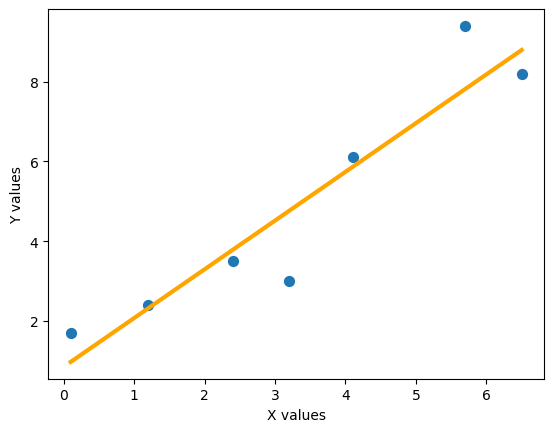

In [47]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

In [48]:
# y_hat = theta0 + theta1*x
y_hat = regr.intercept_[0] + regr.coef_[0][0]*x_5

def mse(y, y_hat):
    ans = 0
    for i in range(y.size):
        ans += (y[i] - y_hat[i])**2
    return ans/y.size

print('MSE: ', mse(y_5, y_hat))

MSE:  [0.94796558]


### 3D Plot for MSE Cost Function

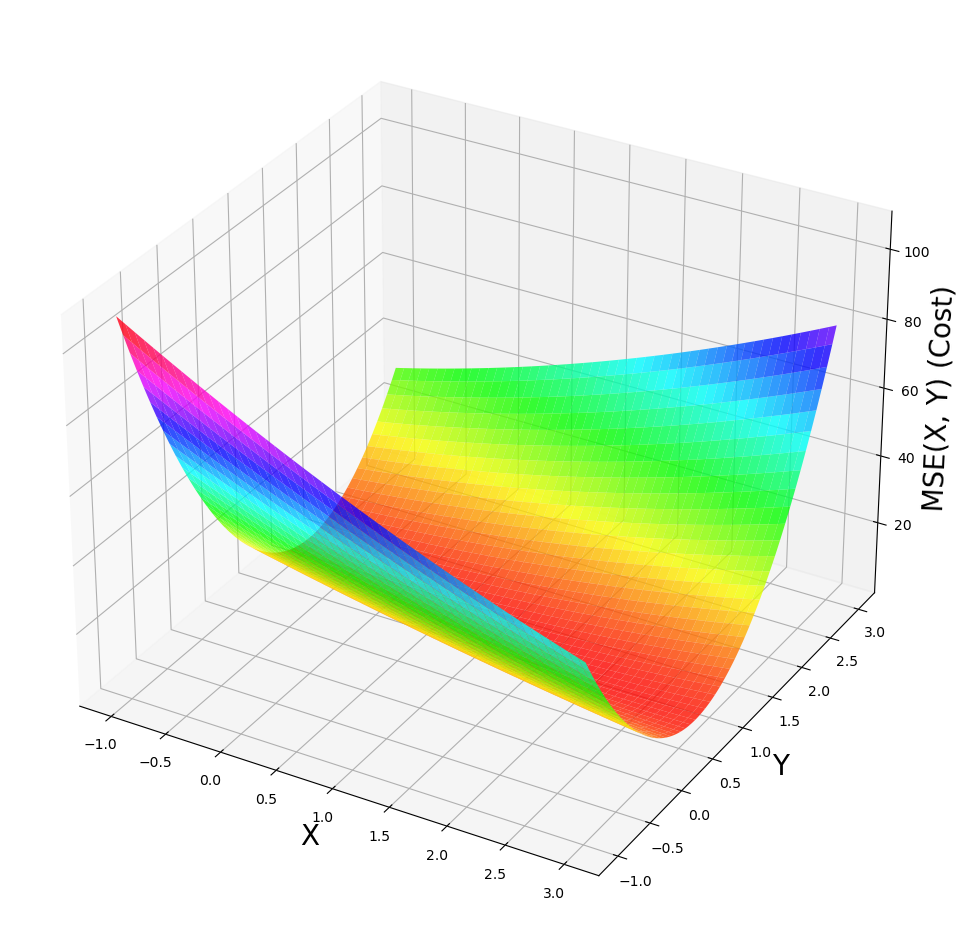

In [49]:
nr_thetas = 250
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

# Calc MSE
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
# plot MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("MSE(X, Y) (Cost)", fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hsv, alpha=0.8)
plt.show()

In [53]:
# Gradient Descent using partial derivatives of MSE
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x) * x)
    return np.append(theta0_slope, theta1_slope)

In [59]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])
t0_list = np.array([2.9])
t1_list = np.array([2.9])
mse_list = np.array([mse(y_5, thetas[0] + thetas[1]*x_5)])

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    t0_list = np.append(t0_list, thetas[0])
    t1_list = np.append(t1_list, thetas[1])
    mse_list = np.append(mse_list, mse(y_5, thetas[0] + thetas[1]*x_5))
    
print('Local minimum found at: ', thetas)
print('Cost at the minimum: ', mse(y_5, thetas[0] + thetas[1]*x_5))

Local minimum found at:  [0.85322305 1.22149353]
Cost at the minimum:  [0.94797511]


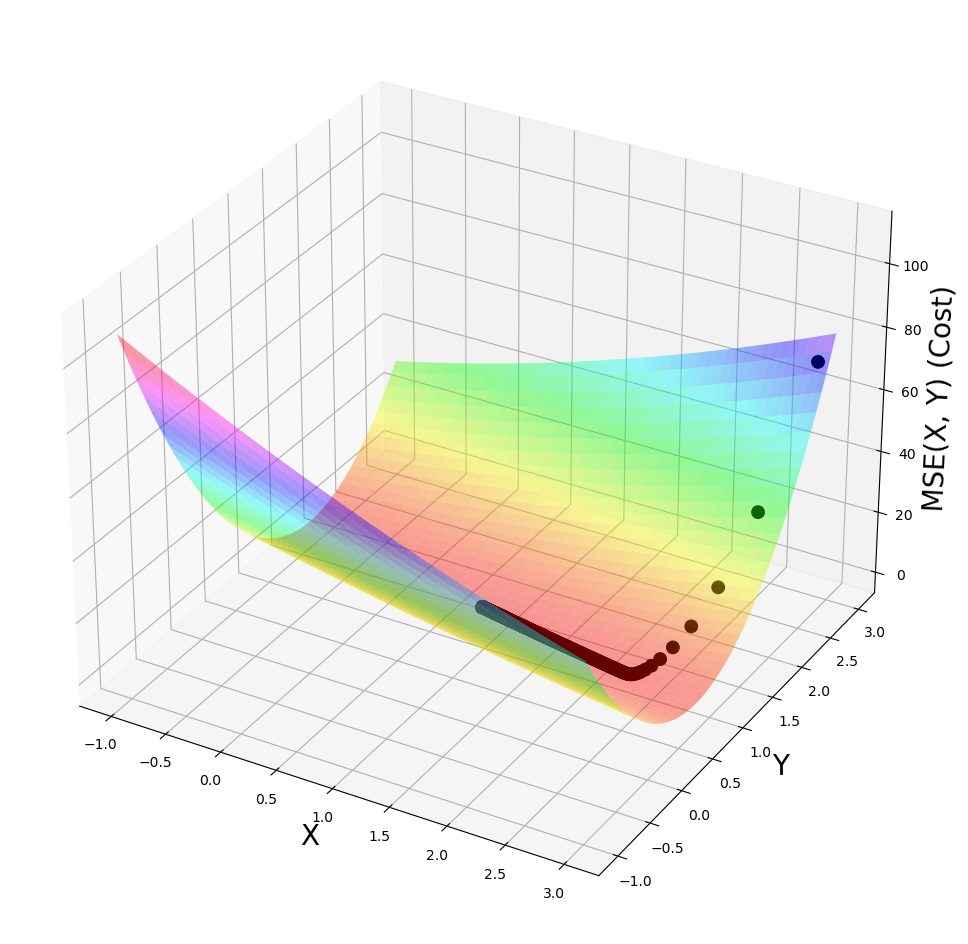

In [63]:
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("MSE(X, Y) (Cost)", fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hsv, alpha=0.4)
ax.scatter(t0_list, t1_list, mse_list, color='black', s=80, alpha = 1.0)
plt.show()